## Problema KNAPSACK_01
* http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [51]:
# fileName = '/content/f1_l-d_kp_10_269'
# capacidade = 269
# optimalSolution = 295

fileName = '/content/f2_l-d_kp_20_878'
capacidade = 878
optimalSolution = 1024

In [52]:
# Leitura do arquivo teste
peso = []
custo=[]
with open(fileName) as f:
    # Ignora a primeira linha
    next(f)
    # Começa a leitura a partir da segunda linha
    for line in f:
      v, w = line.split()
      peso.append(int(w))
      custo.append(int(v))

In [53]:
custo

[44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]

In [54]:
# Função Fitness
# Com framework DEAP, deixar uma virgula para
#  garantir o padrão multiobjetivo
def fitness_function(solucao):
  fitness = 0
  soma_capacidade = 0
  for i in range(len(solucao)):
    if solucao[i] == 1:
      fitness += custo[i]
      soma_capacidade += peso[i]
  if soma_capacidade > capacidade:
    fitness = 0
  return fitness,

In [61]:
# Gera o objetivo toolbox responsável por registrar as configurações do framewrok
toolbox = base.Toolbox()

# Tipo de fitness (Maximização ou Minimização) e cromossomo
creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list, fitness=creator.Maximization)

# Construir o cromossomo
toolbox.register("atributo", random.randint,0,1)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo, n=len(custo))
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

# Cadastrar os operadores
#  Função fitness
toolbox.register("evaluate", fitness_function)
# Cruzamento
toolbox.register("mate", tools.cxTwoPoint)
# Mutação
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# Seleção
toolbox.register("select", tools.selTournament, tournsize=3)

In [67]:
# Gera o Algoritmo Genético com a estrutura e operadores cadastrados
pop = toolbox.Populacao(n=50)
prob_cx= 0.8
prob_mt= 0.1
nger = 200
hof = tools.HallOfFame(10)

# Gera o formato de análise estatística
st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [68]:
# Executa o AG
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, hof, verbose=True)

gen	nevals	Max	Avg   
0  	50    	802	562.16
1  	42    	906	664.12
2  	40    	920	730.6 
3  	42    	1001	743.86
4  	39    	1001	773.42
5  	26    	1016	871.6 
6  	38    	1016	871.28
7  	45    	1016	914.46
8  	44    	1016	877.94
9  	42    	1024	955.1 
10 	40    	1024	965.64
11 	44    	1024	927.44
12 	40    	1024	932.58
13 	44    	1024	1013.68
14 	40    	1024	1022.5 
15 	45    	1024	1017.22
16 	44    	1024	1017.64
17 	43    	1024	978.5  
18 	40    	1024	1018.54
19 	42    	1024	1000.28
20 	43    	1024	1000.3 
21 	29    	1024	1000.26
22 	43    	1024	1020.82
23 	37    	1024	1019.86
24 	41    	1024	1018.68
25 	42    	1024	1022.32
26 	37    	1024	1017.16
27 	44    	1024	1016.9 
28 	48    	1024	1021.06
29 	34    	1024	981.5  
30 	47    	1024	998.48 
31 	46    	1024	1022.86
32 	46    	1024	976.8  
33 	44    	1024	1023.08
34 	38    	1024	1021.04
35 	37    	1024	1019.68
36 	44    	1024	1022.4 
37 	44    	1024	1017.7 
38 	44    	1024	1015.7 
39 	42    	1024	1024   
40 	37    	1024	996.98 
41 	42    

In [69]:
# Selecionar o melhor individuo final
melhorSolucao = tools.selBest(finalPop, 5)
# print(f'{melhorSolucao[0]} - {melhorSolucao[0].fitness.values}')
for ind in melhorSolucao:
  print(f'{ind} - {ind.fitness.values}')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)


In [70]:
# Percorre as melhores soluções armazenadas com HallOfFame
for best in hof:
  print(f'{best} - {best.fitness.values}')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1018.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1016.0,)
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1013.0,)
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1010.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1009.0,)
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] - (1004.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1001.0,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (999.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1] - (997.0,)


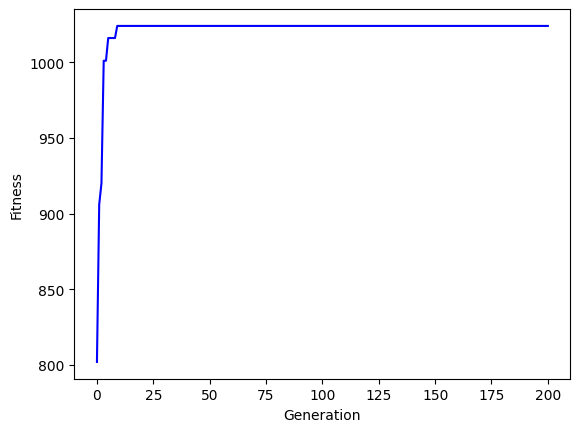

In [71]:
# Plotagem das melhores soluções x média das populações
import matplotlib.pyplot as plt

maxFit, meanFit = log.select("Max", "Avg")

plt.plot(maxFit, color='blue')
# plt.plot(meanFit, color='green')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()